In [8]:
from glob import glob
import seaborn as sns
from scipy.io import wavfile
import os
import h5py
from ephys_util import butter_bandpass_filter, load_wm, get_spikes, psth_channel, get_onsets, h5_to_wav, load_data_new, truncate_audio_new
from datetime import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

# convert h5 audio to wav

In [3]:
isolation1 = 'D:_ephys/2M/2021_09_22_2M/2021_09_22_13_49_22_817445__2M_isolation1'
isolation2 = 'D:_ephys/2M/2021_09_22_2M/2021_09_22_14_35_41_658731__2M_isolation2'
isolation3 = 'D:_ephys/2M/2021_09_22_2M/2021_09_22_15_22_16_351965__2M_isolation3'

dirnames = [isolation1, isolation2, isolation3]

In [4]:
for i in dirnames:
    h5_to_wav(i)

Wrote data to: D:_ephys/2M/2021_09_22_2M/2021_09_22_13_49_22_817445__2M_isolation1\mic_2021_09_22_13_49_22_817445_mic1.wav
Wrote data to: D:_ephys/2M/2021_09_22_2M/2021_09_22_13_49_22_817445__2M_isolation1\mic_2021_09_22_14_19_22_891645_mic1.wav
Wrote data to: D:_ephys/2M/2021_09_22_2M/2021_09_22_14_35_41_658731__2M_isolation2\mic_2021_09_22_14_35_41_658731_mic1.wav
Wrote data to: D:_ephys/2M/2021_09_22_2M/2021_09_22_14_35_41_658731__2M_isolation2\mic_2021_09_22_15_05_41_737536_mic1.wav
Wrote data to: D:_ephys/2M/2021_09_22_2M/2021_09_22_15_22_16_351965__2M_isolation3\mic_2021_09_22_15_22_16_351965_mic1.wav
Wrote data to: D:_ephys/2M/2021_09_22_2M/2021_09_22_15_22_16_351965__2M_isolation3\mic_2021_09_22_15_52_16_433006_mic1.wav


# get the onsets 

In [67]:
isolation1_onsets = get_onsets(27.236, 65.6, 40, 2)
isolation2_onsets = get_onsets(35.933, 65.6, 40, 2)
isolation3_onsets = get_onsets(54.454, 65.6, 40, 2)

In [68]:
len(isolation2_onsets[:-1])

39

# do analysis

In [69]:
all_onsets = [isolation1_onsets, isolation2_onsets[:-1], isolation3_onsets]
dirnames = [isolation1, isolation2, isolation3]

for i in range(1, len(all_onsets)):
    print('Start:' , datetime.datetime.now())
    dirname = dirnames[i]
    
    sr_phys, data_phys, data_audio, ephys_trigger = load_data_new(dirname, phys_bandpass=(200, 4000))
    
    spikes = get_spikes(data_phys, threshold=4)
    
    sr_am, am = wavfile.read('/Users/ralph/Downloads/white_sine_2s.wav')
    
    onsets = all_onsets[i]
    
    folder_name = 'psth_am'
    
    if os.path.exists(os.path.join(dirname, folder_name)) == False:
        os.mkdir(os.path.join(dirname, folder_name))

    psth_channel(spikes, am, onsets, ephys_trigger, sr_audio = sr_am,
                 save_fig=True, outname='_am_{}'.format(dirname.split('_')[-1]),
                 savedir=os.path.join(dirname, folder_name), hide_plot=True)
    print('Stop:' , datetime.datetime.now())
    print()
#     psth_channel(spikes, am, onsets, ephys_trigger, sr_audio = sr_am,
#                             save_fig=True, outname='_am_{}'.format(dirname.split('_')[-1]), hide_plot=True)

Start: 2021-09-28 13:55:50.216488
Loading physiology data...
Bandpassing from 200-4000 Hz...
Computing mean signal across all channels...
Subtracting mean signal across all channels...

Truncating audio...
Ephys trigger detected at analog sample number 3431443


Stop: 2021-09-28 14:45:19.814917

Start: 2021-09-28 14:45:19.814917
Loading physiology data...
Bandpassing from 200-4000 Hz...
Computing mean signal across all channels...
Subtracting mean signal across all channels...

Truncating audio...
Ephys trigger detected at analog sample number 5243993


Stop: 2021-09-28 15:13:53.826364



## troubleshoot

In [28]:
import ephys_util

In [47]:
audio = am
sr_audio = 125000
pad = 1

all_spikes = []

for onset in isolation2_onsets:

    dur = len(audio)/sr_audio
    offset = onset + dur + pad
    onset = onset - pad
    total_dur = dur + (2*pad)


    spikes_trunc = ephys_util.truncate_spikes(spikes, onset = onset,offset = offset,ephys_trigger=ephys_trigger)
    print(shape(spikes_trunc))
    all_spikes.append(spikes_trunc)

(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64, 0)


In [62]:
ephys_trigger/125000

27.451544

In [59]:
isolation2_onsets-(ephys_trigger/125000)

array([   8.481456,   76.081456,  143.681456,  211.281456,  278.881456,
        346.481456,  414.081456,  481.681456,  549.281456,  616.881456,
        684.481456,  752.081456,  819.681456,  887.281456,  954.881456,
       1022.481456, 1090.081456, 1157.681456, 1225.281456, 1292.881456,
       1360.481456, 1428.081456, 1495.681456, 1563.281456, 1630.881456,
       1698.481456, 1766.081456, 1833.681456, 1901.281456, 1968.881456,
       2036.481456, 2104.081456, 2171.681456, 2239.281456, 2306.881456,
       2374.481456, 2442.081456, 2509.681456, 2577.281456, 2644.881456])

In [65]:
(shape(data_phys)[0]/sr_phys) - 1800

855.2689599999999

In [64]:
1800 + 872.331 - (27.451544)

2644.879456

In [46]:
shape(spikes_trunc)

(64, 0)

In [44]:
for i in range(64):
    ch = np.vstack(all_spikes)[:,i]
    print(i)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 64 and the array at index 39 has size 0

In [37]:
len(all_spikes)

40

In [22]:
pad

<function numpy.pad(array, pad_width, mode='constant', **kwargs)>

# psth plots

In [70]:
psths_iso1 = np.load(glob(isolation1 + '/psth_am/*.npy')[0], allow_pickle=True)
psths_iso2 = np.load(glob(isolation2 + '/psth_am/*.npy')[0], allow_pickle=True)
psths_iso3 = np.load(glob(isolation3 + '/psth_am/*.npy')[0], allow_pickle=True)

<ipython-input-71-e652eb1c3a07>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure()


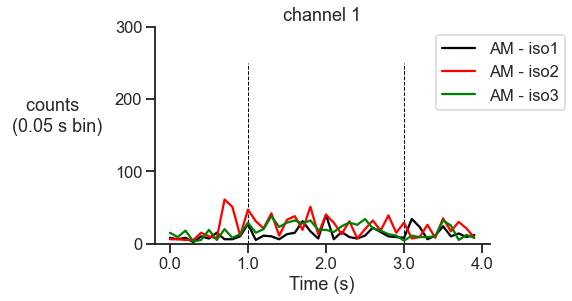

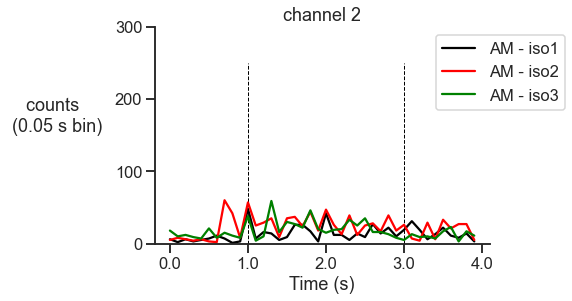

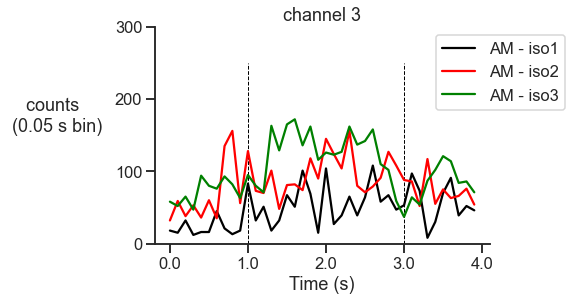

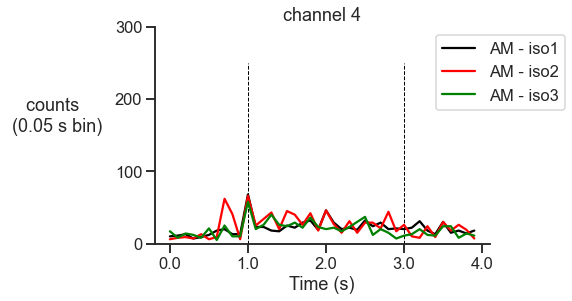

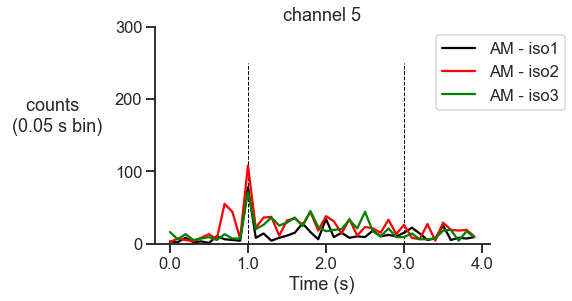

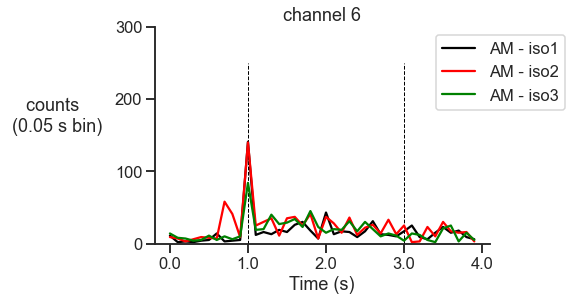

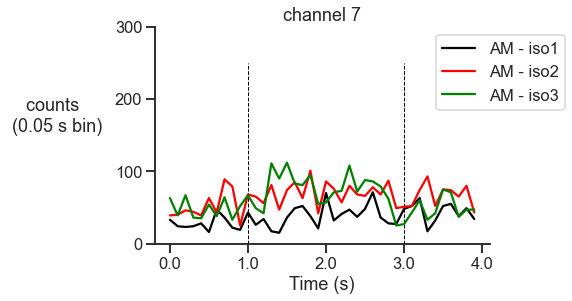

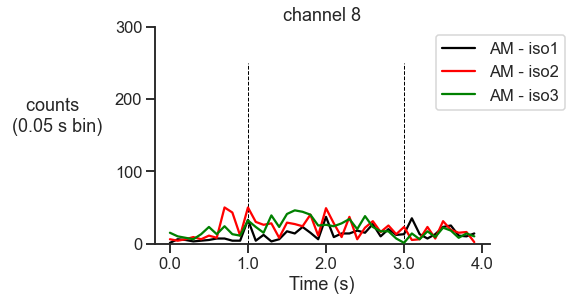

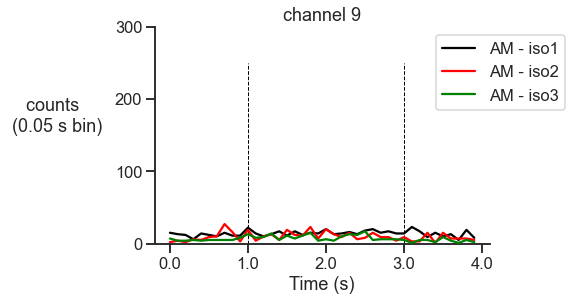

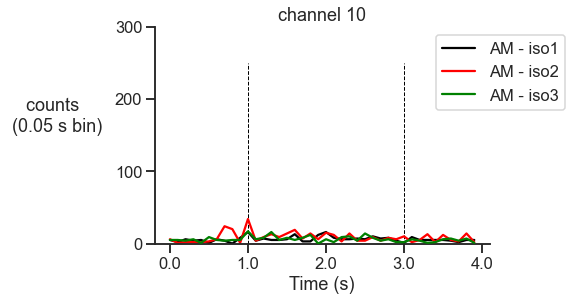

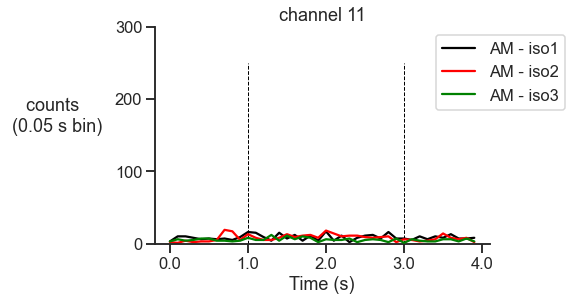

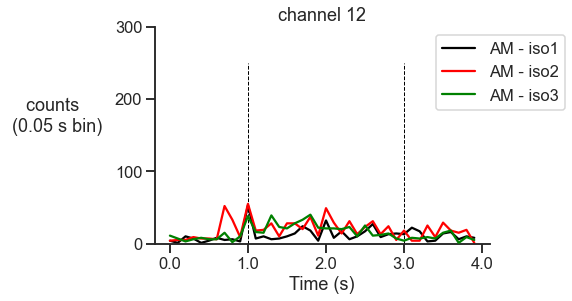

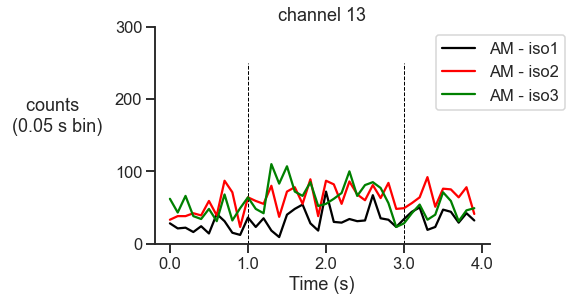

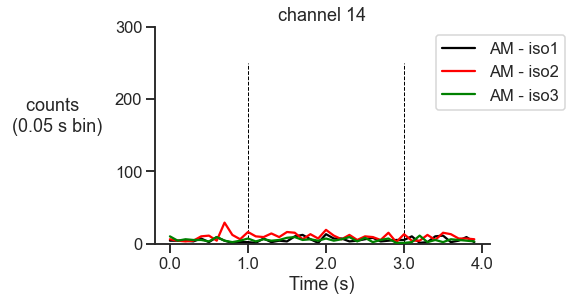

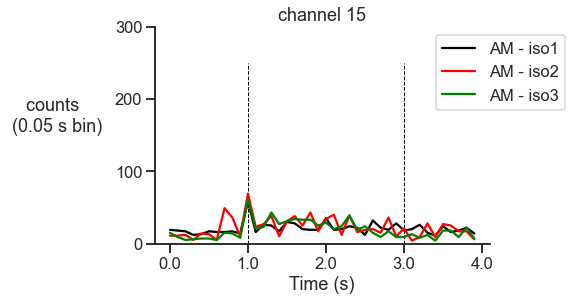

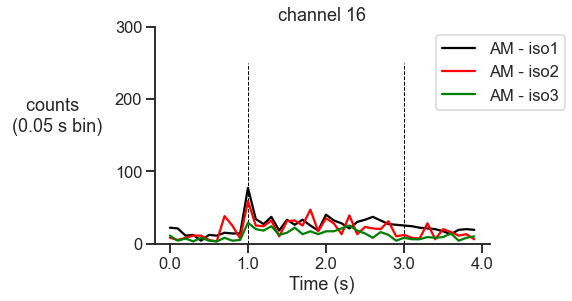

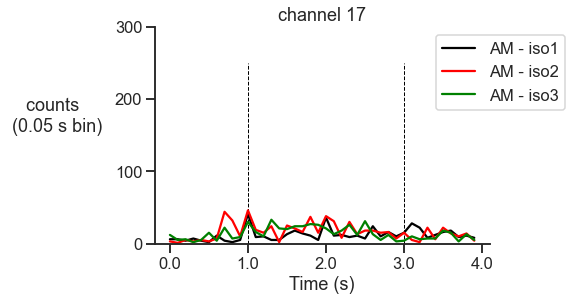

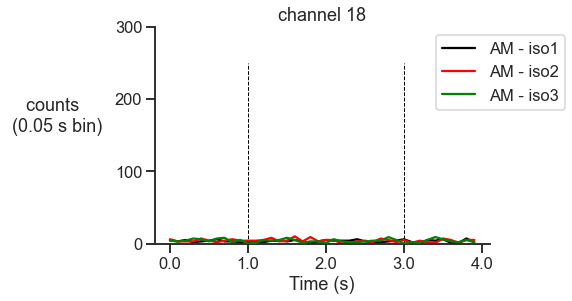

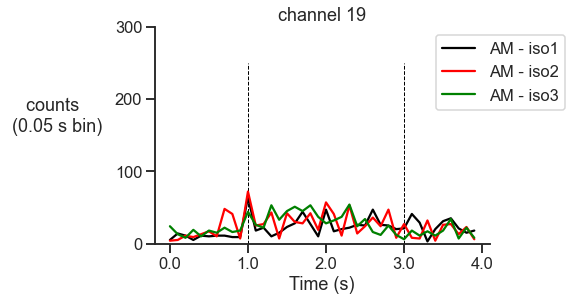

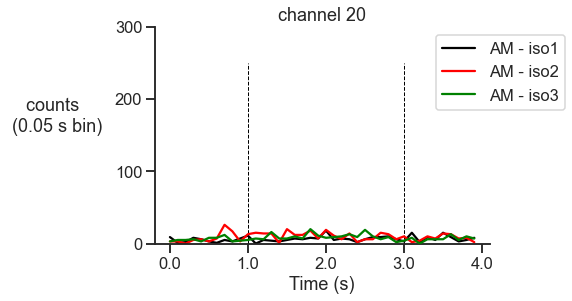

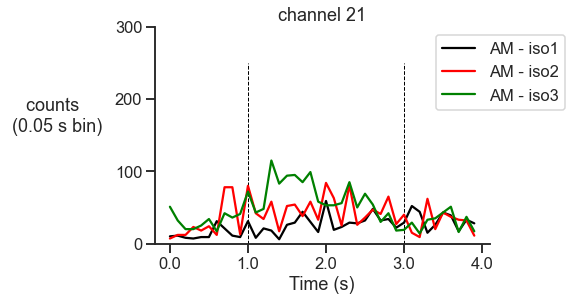

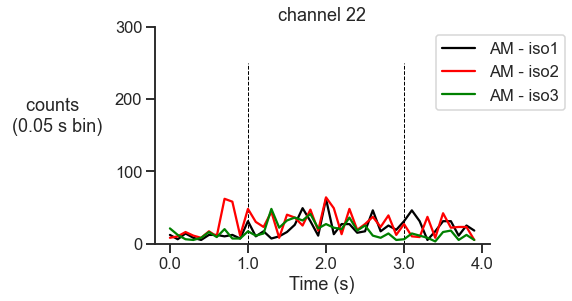

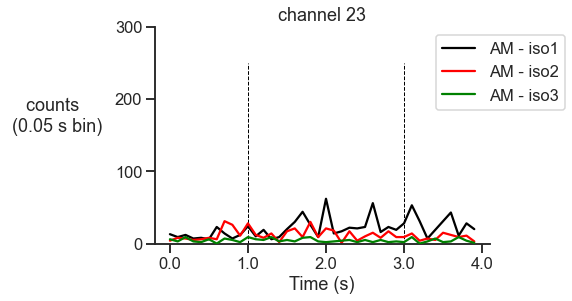

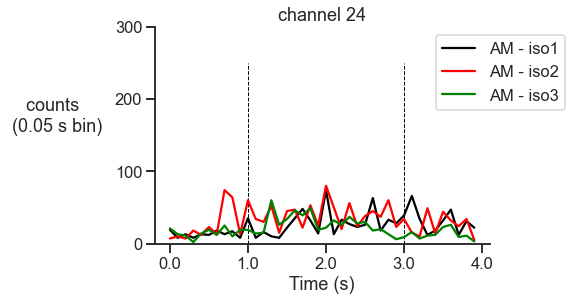

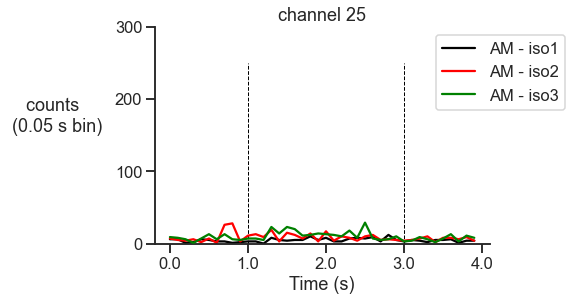

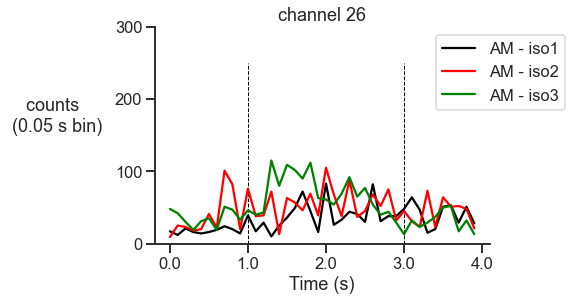

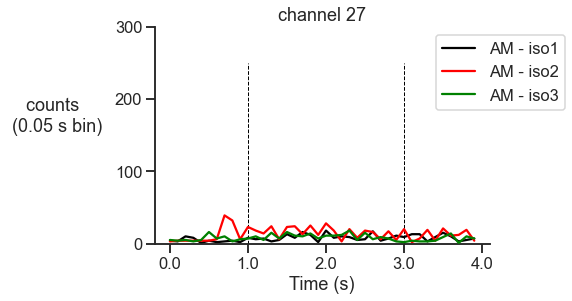

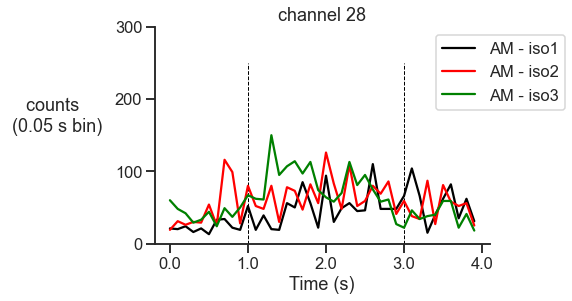

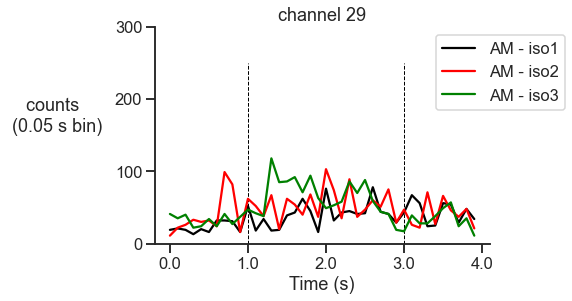

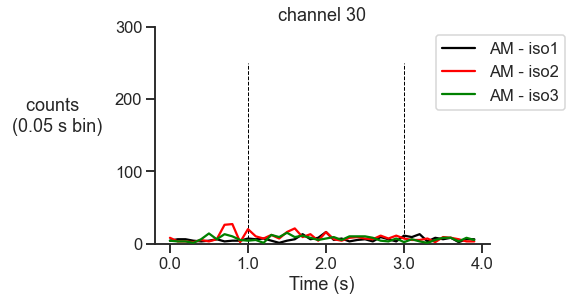

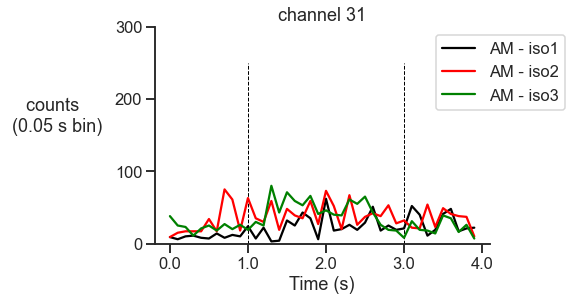

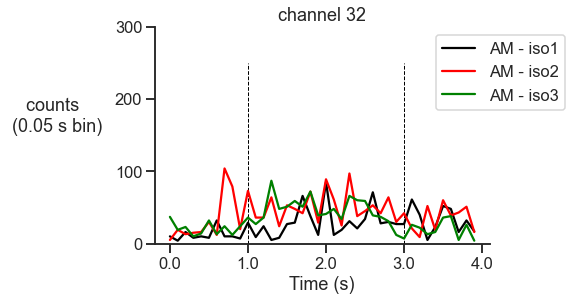

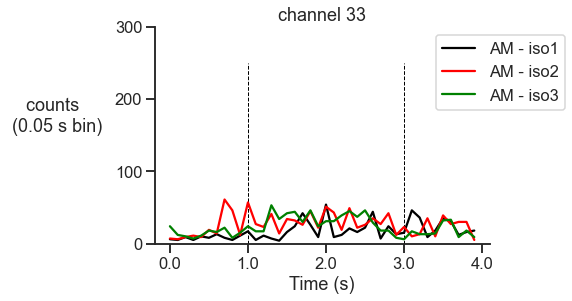

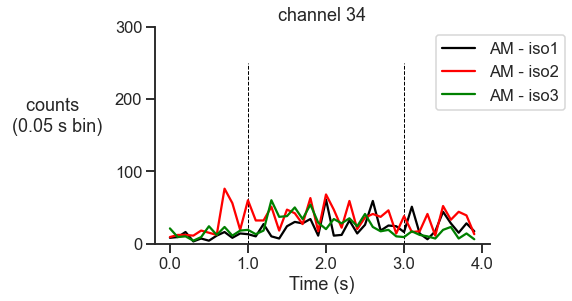

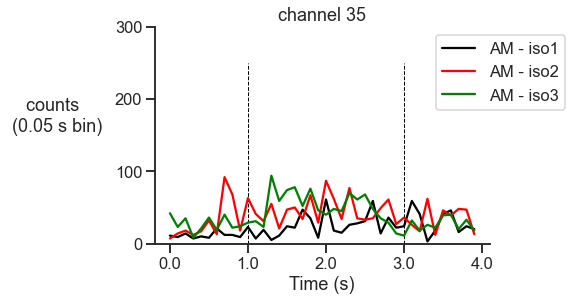

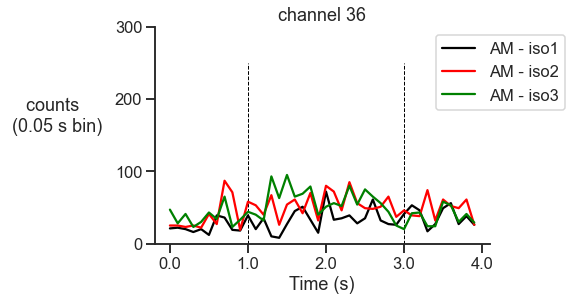

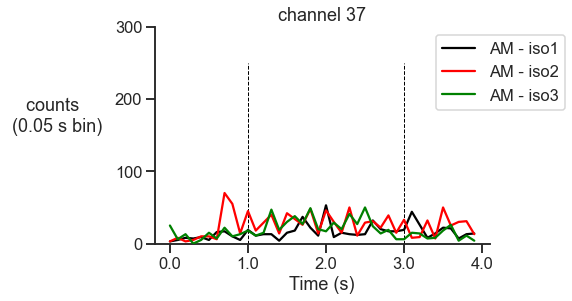

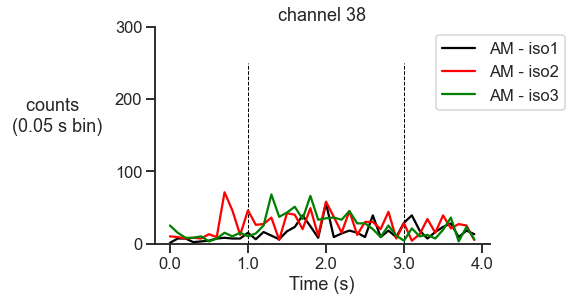

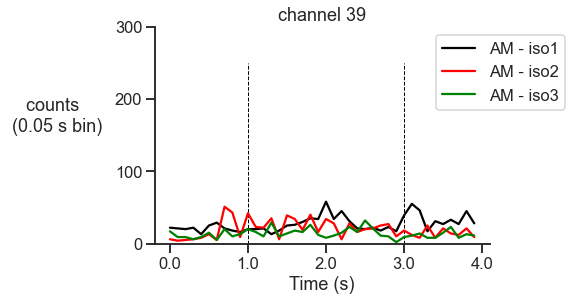

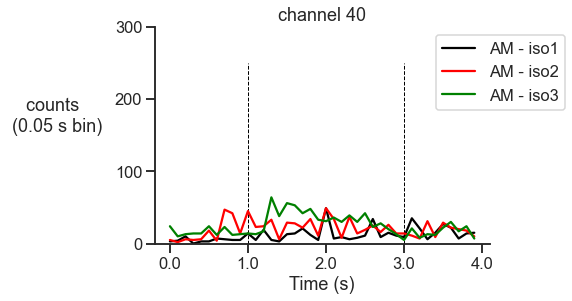

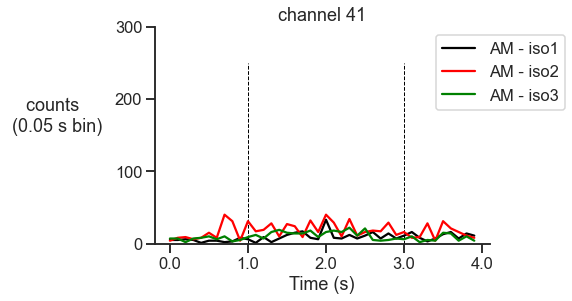

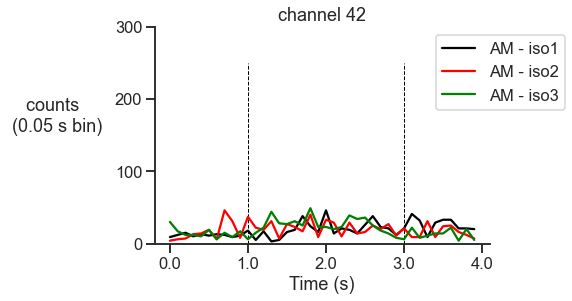

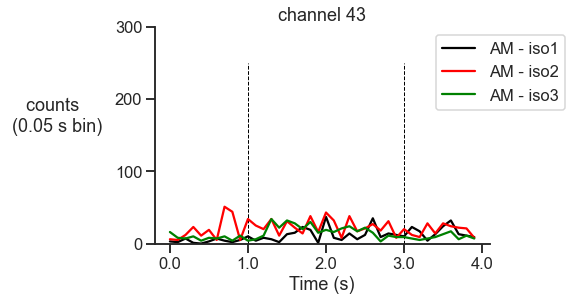

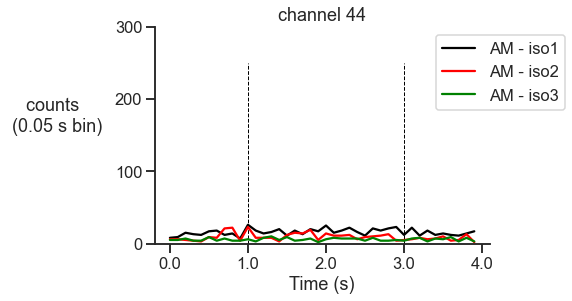

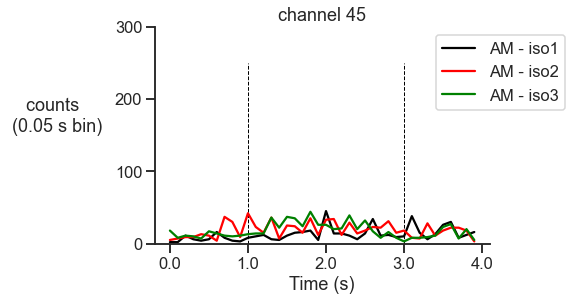

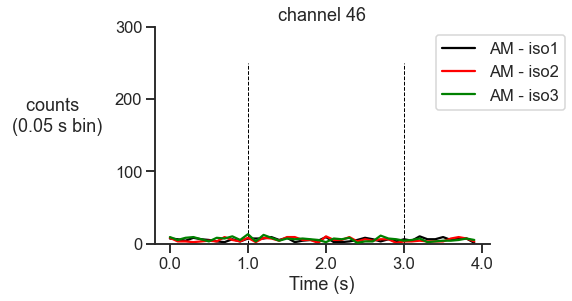

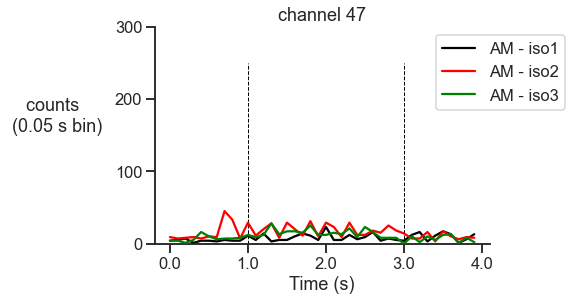

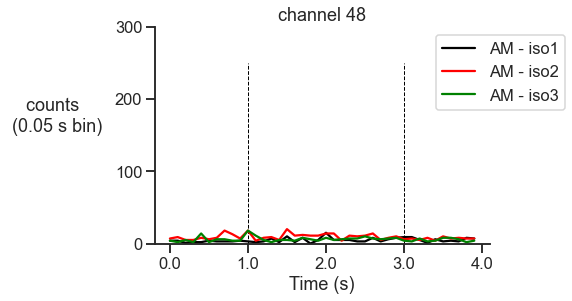

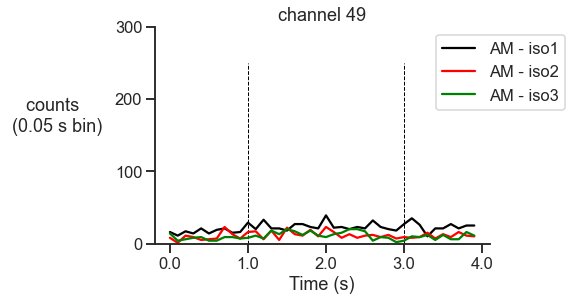

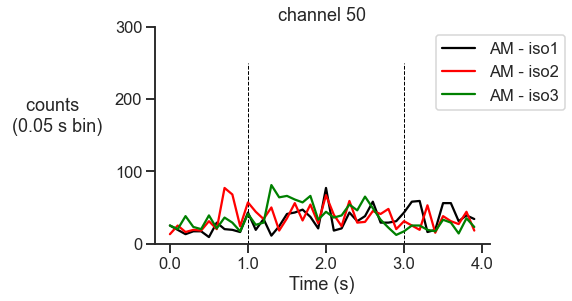

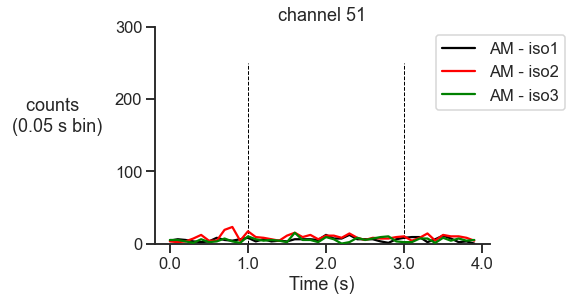

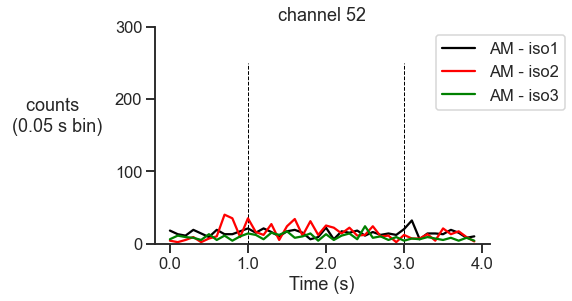

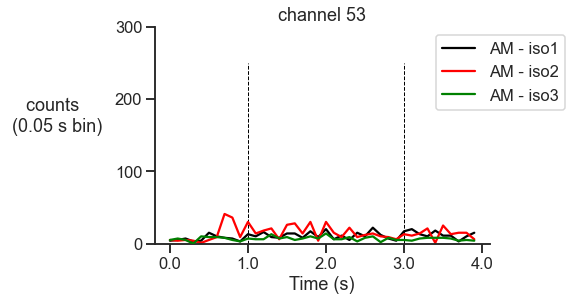

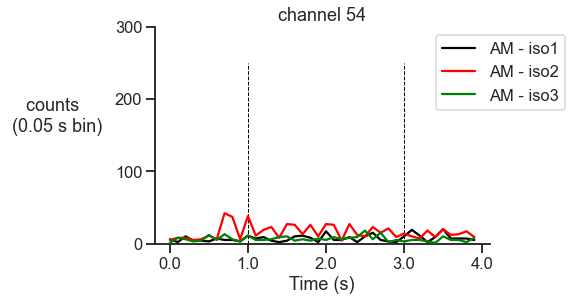

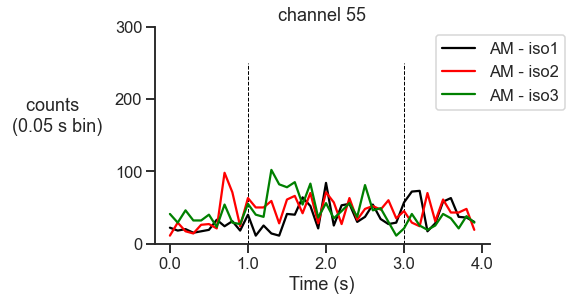

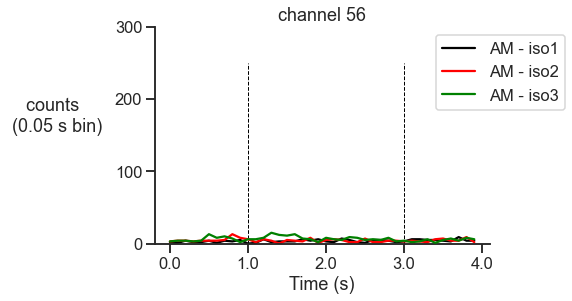

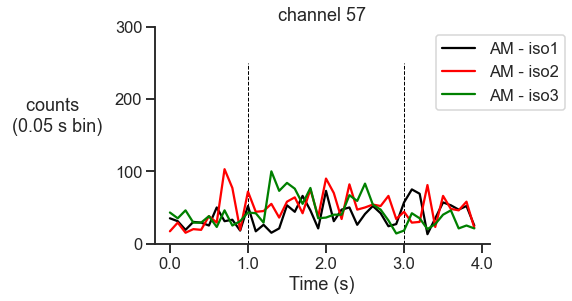

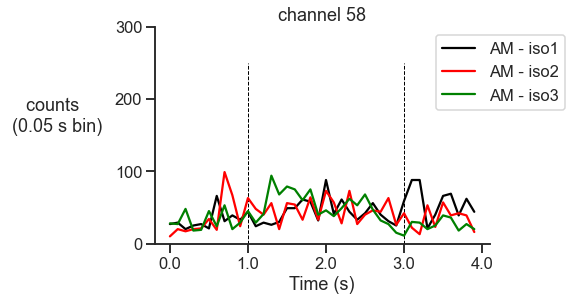

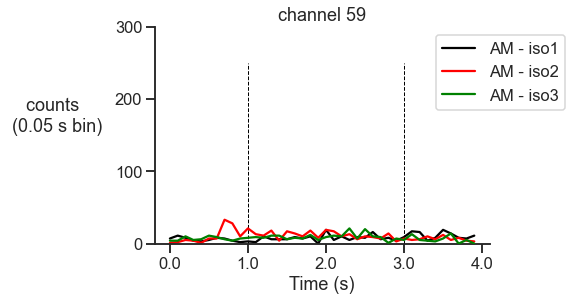

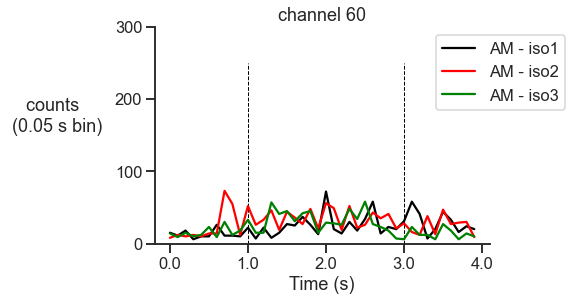

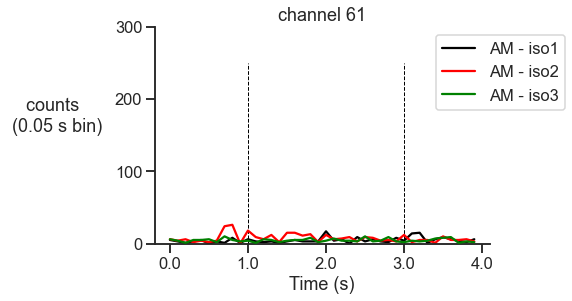

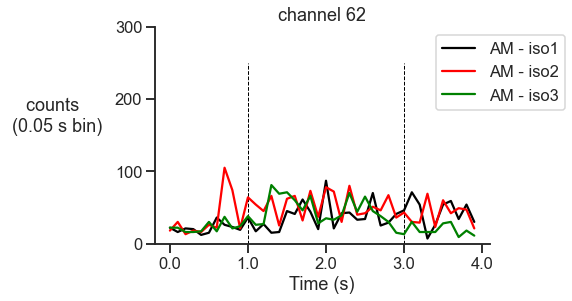

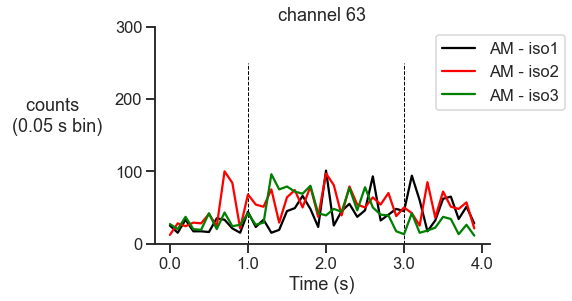

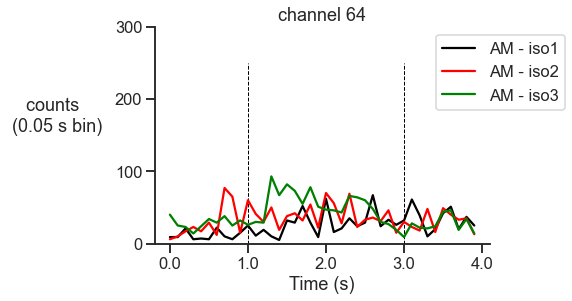

In [71]:
for i in range(64):
    figure()
   
    plot(psths_iso1[:,1][i][:-1], psths_iso1[:,0][i], label='AM - iso1', color='black', zorder=1) 
    plot(psths_iso2[:,1][i][:-1], psths_iso2[:,0][i], label='AM - iso2', color='red', zorder=2) 
    plot(psths_iso3[:,1][i][:-1], psths_iso3[:,0][i], label='AM - iso3', color='green', zorder=3) 

    
    ylim(-1,300)
    vlines(12500, 0, 250, linestyle='--', color='k', linewidth=1)
    vlines(12500*3, 0, 250, linestyle='--', color='k', linewidth=1)
    ylabel('counts \n (0.05 s bin)', rotation=0, labelpad=60)
    xticks(np.arange(0, psths_iso1[:,1][i][-1]+1, 12500),
           np.arange(0, psths_iso1[:,1][i][-1]+1, 12500)/12500)
    xlabel('Time (s)')
    legend(bbox_to_anchor=(1.25,1))
    title('channel {}'.format(i+1))
    sns.despine()